#Применен метод k-means для данных из указанной ссылки. Построен кластер для следующих комбинаций атрибутов: показатель BMI и возраст (Age), показатель BloodPressure и возраст (Age). Построена визуализация результатов. Также применен метод иерархической кластеризации с выводом дендрограммы для тех же комбинаций атрибутов.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#загружаем набор данных
df = pd.read_csv('diabetes.csv')
#первые 5 строк
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#k-means

BMI - AGE

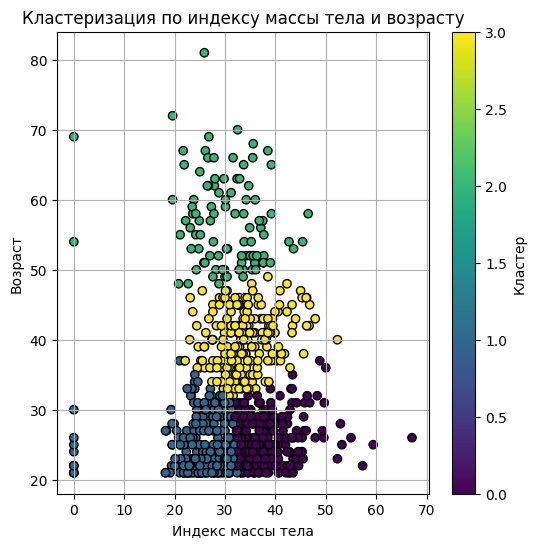

In [ ]:
# выбираем необходимые столбцы
X = df[['BMI', 'Age']]

# Задаем кодичесво класстеров и итераций
kmeans = KMeans(n_clusters=4, n_init=5)
kmeans.fit(X)
#Добавление столбца с класстерами
df['Cluster'] = kmeans.labels_
#Визуализация
plt.figure(figsize=(6, 6))
plt.scatter(df['BMI'], df['Age'], c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.title('Кластеризация по индексу массы тела и возрасту')
plt.xlabel('Индекс массы тела')
plt.ylabel('Возраст')
plt.colorbar(label='Кластер')
plt.grid(True)
plt.show()

BloodPressure - AGE

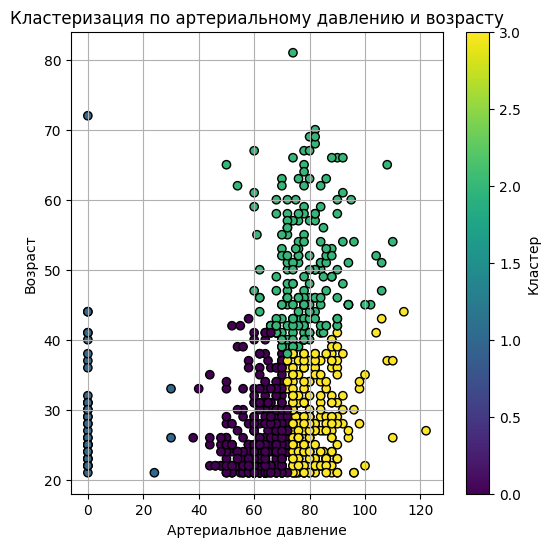

In [ ]:
# выбираем необходимые столбцы
X = df[['BloodPressure', 'Age']]

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(6, 6))
plt.scatter(df['BloodPressure'], df['Age'], c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.title('Кластеризация по артериальному давлению и возрасту')
plt.xlabel('Артериальное давление')
plt.ylabel('Возраст')
plt.colorbar(label='Кластер')
plt.grid(True)
plt.show()

#Иерархическая_кластеризация

BMI - AGE

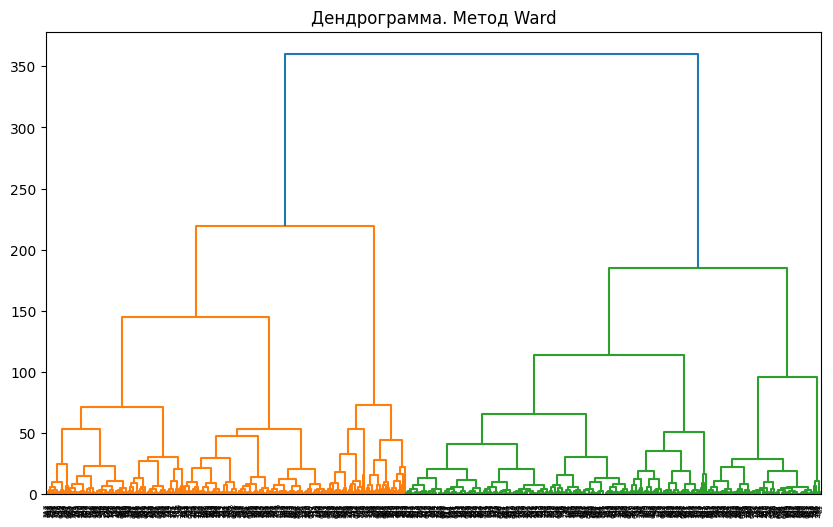

In [ ]:
X = df[['BMI', 'Age']]

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)
df['Cluster'] = agg_clustering.labels_

# Вычисляем матрицу расстояний и строим дендрограмму по методу Варда
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Дендрограмма. Метод Ward')
plt.show()

BloodPressure - AGE

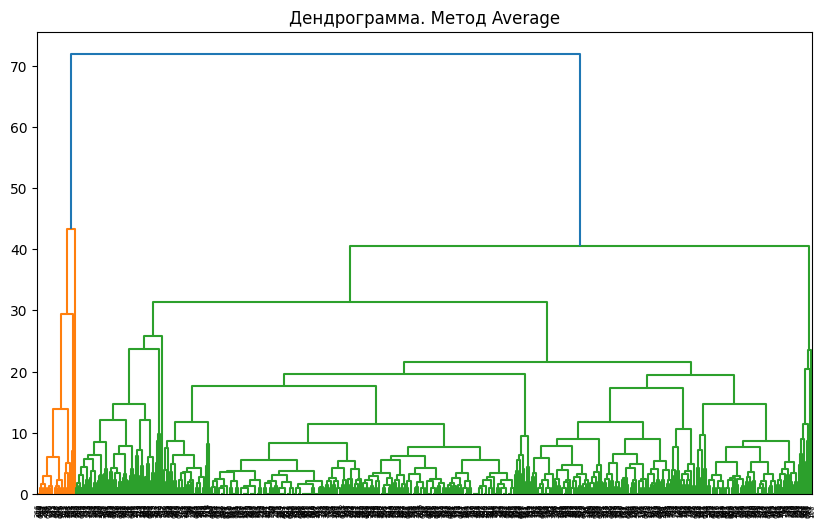

In [ ]:
# Выбираем необходимые столбцы
X = df[['BloodPressure', 'Age']]

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
agg_clustering.fit(X)
df['Cluster'] = agg_clustering.labels_

linked = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Дендрограмма. Метод Average')
plt.show()